In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [54]:
df = pd.read_csv('movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [55]:
df.shape

(10866, 21)

In [56]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [57]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [58]:
df.drop(columns=['id', 'imdb_id', 'homepage', 'cast', 'tagline', 'overview', 'budget_adj', 'revenue_adj'], inplace=True)

In [59]:
df.head()

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [60]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [61]:
df.dropna(how = 'any', subset = ['genres', 'director'], inplace=True)

In [69]:
df['production_companies'] = df['production_companies'].fillna(0)
df['keywords'] = df['keywords'].fillna(0)

In [70]:
df['popularity']= df['popularity'].round(2)
df['roi']= df['roi'].round(2)

In [ ]:
df

In [65]:
df.insert(3, 'profit', df.revenue - df.budget)

In [66]:
df.insert(4, 'roi', df.profit / df.budget)

In [67]:
df['roi']= df['roi'].round(2)

In [68]:
df

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.11,110000000,295238201,185238201,1.68,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.17,200000000,2068178225,1868178225,9.34,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.34,190000000,1506249360,1316249360,6.93,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,0,0,NaN,The Endless Summer,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,0.07,0,0,0,NaN,Grand Prix,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [71]:
df1 = df[['popularity', 'budget', 'revenue', 'profit', 'roi', 'vote_count', 'vote_average', 'release_year']]

In [72]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
profit                     0
roi                     4641
original_title             0
director                   0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [73]:
df.roi.value_counts()

roi
-1.00     1350
 inf       995
-0.99       29
-0.98       27
-0.38       21
          ... 
 4.15        1
 24.90       1
 2.32        1
 6.24        1
 6.62        1
Name: count, Length: 1075, dtype: int64

In [74]:
noon_finite_values = -np.isfinite(df['roi'])

In [75]:
noon_finite_values.sum()

5636

In [76]:
df['roi'] = df['roi'].replace([np.inf, -np.inf], np.nan)

ValueError: supplied range of [-1.0, inf] is not finite

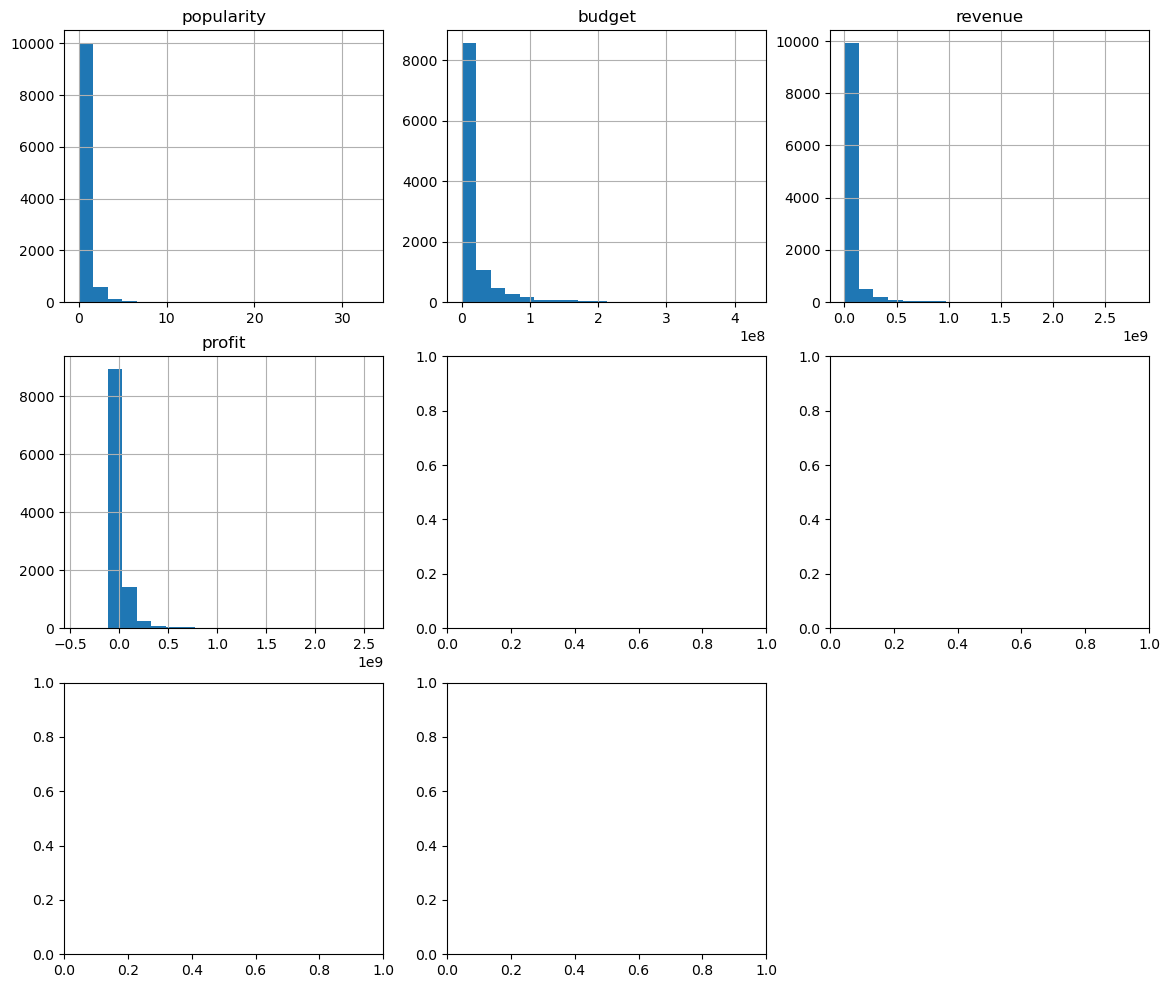

In [77]:
df1.hist(bins=20, figsize=(14,12))
plt.show()

In [34]:
df.popularity.value_counts()

popularity
0.14    193
0.28    190
0.21    186
0.25    182
0.20    179
       ... 
5.81      1
5.08      1
3.83      1
3.74      1
2.68      1
Name: count, Length: 483, dtype: int64

In [37]:
df.head(2)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


In [38]:
df2 = df.groupby('release_year')['roi'].mean()
df2

release_year
1960        5.423333
1961        5.911538
1962        4.529286
1963        2.926364
1964        5.500000
1965        3.242727
1966        0.178333
1967        8.481667
1968        1.616000
1969        3.130000
1970        8.112143
1971        6.293913
1972       35.256471
1973       21.225556
1974       23.580952
1975       17.217143
1976       13.286471
1977       40.420741
1978       16.149630
1979       15.343750
1980        7.311290
1981        6.065238
1982        6.586000
1983        2.836250
1984        3.940556
1985     1071.336364
1986    16979.924833
1987        3.779286
1988        2.010597
1989        3.474091
1990        3.123607
1991        1.661639
1992        2.792923
1993        2.004270
1994        3.436588
1995        2.069362
1996        1.154622
1997        2.010862
1998        1.458091
1999       68.272081
2000        0.850833
2001        1.267902
2002        1.750060
2003        1.456536
2004        7.280929
2005        1.859034
2006        1.584882


<Axes: xlabel='release_year'>

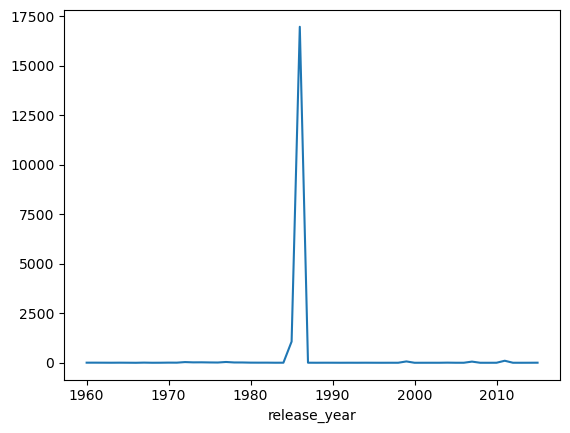

In [39]:
df2.plot(kind = 'line')

Text(0, 0.5, 'Popularity')

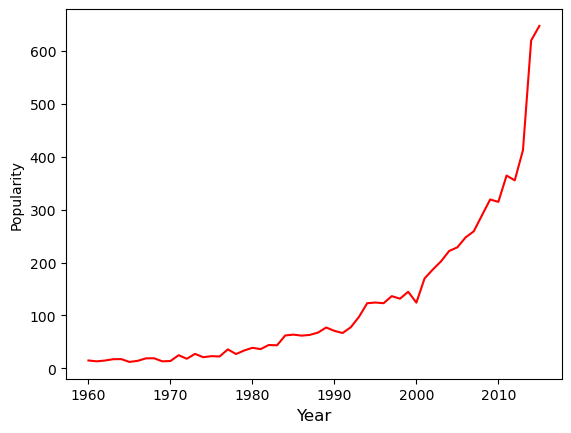

In [40]:
df3 = df.groupby('release_year')['popularity'].sum()
df3.plot(kind='line', color='red')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Popularity')

Text(0, 0.5, 'Rating')

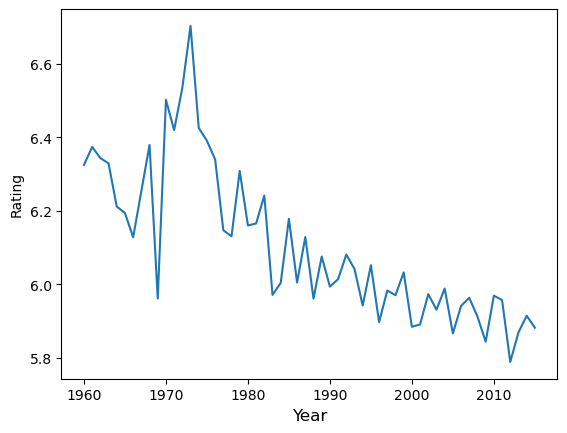

In [41]:
df4 = df.groupby('release_year')['vote_average'].mean()
df4.plot(kind='line')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Rating')

Text(0.5, 1.0, 'Popularity vs Vote Average')

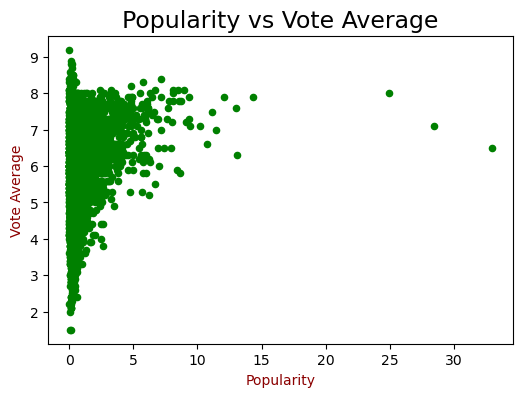

In [46]:
df5 = df.plot.scatter(x='popularity', y='vote_average', color='green', figsize=(6,4))
df5.set_xlabel('Popularity', color='darkred')
df5.set_ylabel('Vote Average', color='darkred')
df5.set_title('Popularity vs Vote Average', fontsize = 17)

In [78]:
df.genres.value_counts()

genres
Drama                                      711
Comedy                                     707
Documentary                                306
Drama|Romance                              289
Comedy|Drama                               280
                                          ... 
Science Fiction|Horror|Action|Thriller       1
Action|Thriller|Science Fiction|Mystery      1
Comedy|Music|Romance|Foreign                 1
Documentary|Drama|Comedy                     1
Mystery|Science Fiction|Thriller|Drama       1
Name: count, Length: 2031, dtype: int64

In [79]:
df

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.11,110000000,295238201,185238201,1.68,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.17,200000000,2068178225,1868178225,9.34,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.34,190000000,1506249360,1316249360,6.93,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,0,0,NaN,The Endless Summer,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,0.07,0,0,0,NaN,Grand Prix,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [80]:
split = ['genres']
for i in split:
    df[i] = df[i].apply(lambda x: x.split('|'))
df.head(3)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.11,110000000,295238201,185238201,1.68,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


In [81]:
df = df.explode('genres')
df

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery,Mosfilm,1/1/66,11,6.5,1966
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action,Benedict Pictures Corp.,11/2/66,22,5.4,1966
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [82]:
df7 = df.groupby('genres')['popularity'].sum().sort_values(ascending=True)
df7

genres
Foreign              35.24
TV Movie             44.03
Documentary          93.13
Western              97.42
History             192.35
War                 196.48
Music               198.15
Mystery             558.55
Animation           594.46
Horror              761.39
Fantasy             908.87
Family              967.06
Crime              1009.07
Romance            1013.21
Science Fiction    1230.41
Adventure          1697.11
Thriller           2155.90
Action             2208.08
Comedy             2246.25
Drama              2815.43
Name: popularity, dtype: float64

<Axes: ylabel='genres'>

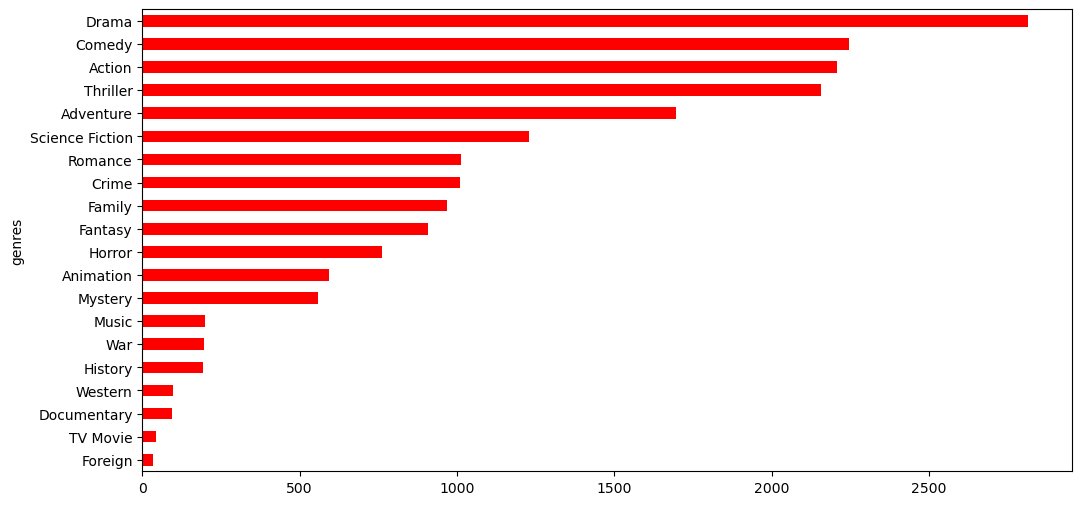

In [83]:
df7.plot.barh(x='genres', y='popularity', color='red', figsize=(12,6))

In [84]:
df.head(1)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [85]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
profit                    int64
roi                     float64
original_title           object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [86]:
df['release_date'] = pd.to_datetime(df['release_date'])

C:\Users\owner\AppData\Local\Temp\ipykernel_28004\1525507706.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [87]:
df['extracted_month'] = df['release_date'].dt.month

In [88]:
df.head()

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,extracted_month
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,5


In [89]:
df8 = df.groupby('extracted_month')['popularity'].sum()

In [90]:
df8

extracted_month
1     1131.78
2     1092.93
3     1458.32
4     1191.81
5     1687.53
6     1936.84
7     1694.03
8     1432.59
9     1872.28
10    1811.91
11    1710.35
12    2002.22
Name: popularity, dtype: float64

In [91]:
df.index

Index([    0,     0,     0,     0,     1,     1,     1,     1,     2,     2,
       ...
       10860, 10861, 10862, 10862, 10862, 10863, 10863, 10864, 10864, 10865],
      dtype='int64', length=26869)

In [92]:
data = {
    'extracted_month': df8.index,
    'popularity': df8.values
       
}
df8 = pd.DataFrame(data)

In [93]:
df8

,extracted_month,popularity
0,1,1131.78
1,2,1092.93
2,3,1458.32
3,4,1191.81
4,5,1687.53
5,6,1936.84
6,7,1694.03
7,8,1432.59
8,9,1872.28
9,10,1811.91


In [94]:
index_to_month = {
    1:'Jan', 2:'feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'  
}

In [95]:
df8.extracted_month = df8.extracted_month.map(index_to_month)

In [96]:
df8

,extracted_month,popularity
0,Jan,1131.78
1,feb,1092.93
2,Mar,1458.32
3,Apr,1191.81
4,May,1687.53
5,Jun,1936.84
6,Jul,1694.03
7,Aug,1432.59
8,Sep,1872.28
9,Oct,1811.91


<Axes: xlabel='extracted_month'>

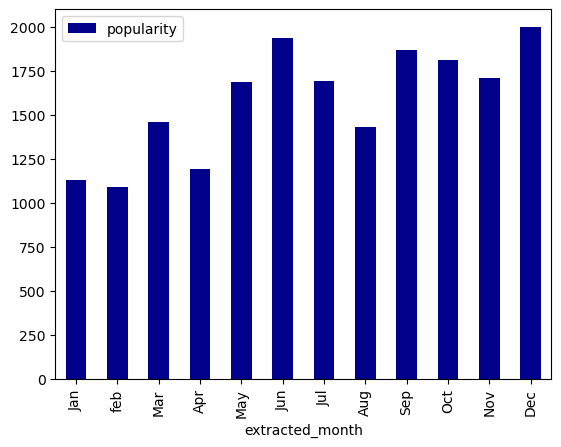

In [97]:
df8.plot(kind = 'bar', x='extracted_month', y='popularity', color='darkblue')

In [98]:
df9 = df.groupby('extracted_month')['revenue'].sum()
df9

extracted_month
1      35873456579
2      54352852344
3      93669046441
4      77813179749
5     151475532493
6     193681776686
7     141947570995
8      71642408883
9      70379641581
10     84054172048
11    139176268899
12    164738399960
Name: revenue, dtype: int64

In [99]:
data = {
    'extracted_month': df9.index,
    'revenue': df9.values
       
}
df9 = pd.DataFrame(data)

In [100]:
index_to_month = {
    1:'Jan', 2:'feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'  
}

In [101]:
df9.extracted_month = df9.extracted_month.map(index_to_month)

In [102]:
df9

,extracted_month,revenue
0,Jan,35873456579
1,feb,54352852344
2,Mar,93669046441
3,Apr,77813179749
4,May,151475532493
5,Jun,193681776686
6,Jul,141947570995
7,Aug,71642408883
8,Sep,70379641581
9,Oct,84054172048


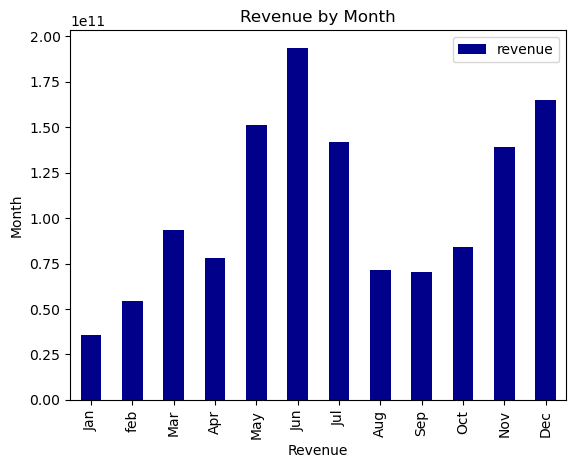

In [103]:
df9.plot(kind = 'bar', x='extracted_month', y='revenue', color='darkblue')
plt.title('Revenue by Month')
plt.xlabel('Revenue')
plt.ylabel('Month')
plt.show()

In [104]:
df.head()

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,extracted_month
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,5


In [107]:
df10 = df.groupby('original_title')['profit'].sum().sort_values(ascending=False).head(5)
df10

original_title
Avatar                          10178023388
Star Wars: The Force Awakens     7472712900
Jurassic World                   5454115240
The Net                          5421398290
Titanic                          4896102564
Name: profit, dtype: int64

Text(0.5, 1.0, 'Top 5 MOVIES BY PROFIT')

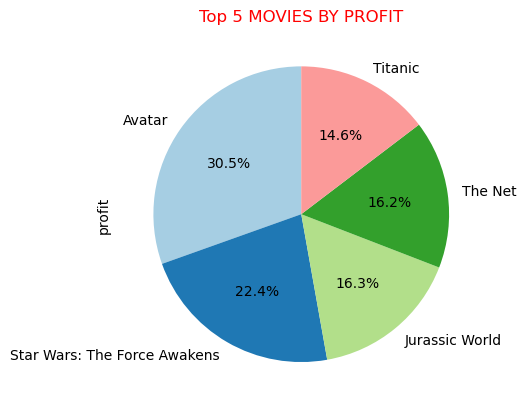

In [108]:
df10.plot(kind = 'pie', autopct = '%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 MOVIES BY PROFIT', color='red')

In [112]:
df.head()

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,extracted_month
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,5


In [127]:
df11 = df.production_companies.value_counts().head(6)
df11 = df11.iloc[1:6]
df11

production_companies
Paramount Pictures      404
Universal Pictures      352
Walt Disney Pictures    236
Warner Bros.            225
Columbia Pictures       207
Name: count, dtype: int64

In [128]:
df11.index

Index(['Paramount Pictures', 'Universal Pictures', 'Walt Disney Pictures',
       'Warner Bros.', 'Columbia Pictures'],
      dtype='object', name='production_companies')

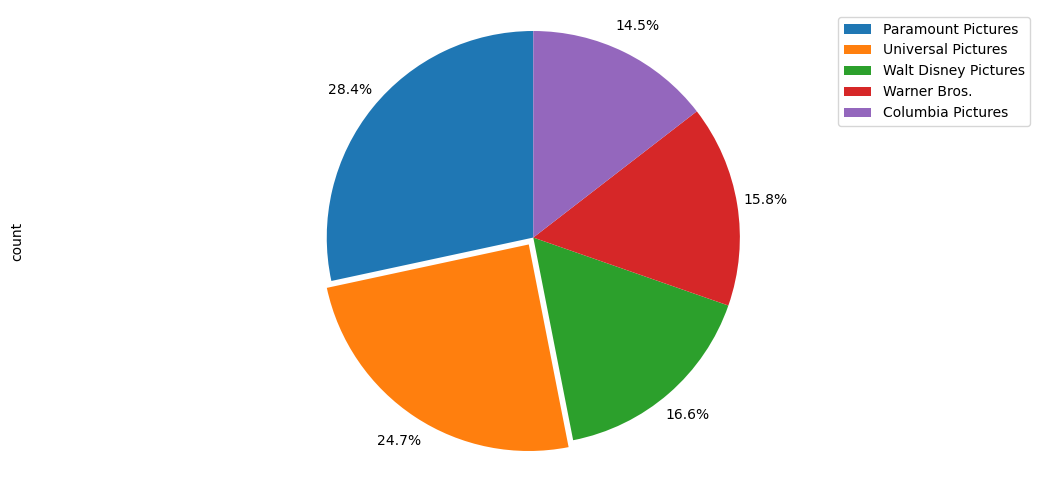

In [129]:
explode_list = [0,0.04,0,0,0]
df11.plot(kind = 'pie', figsize = (13,6), autopct = '%1.1f%%', startangle=90, labels=None, pctdistance=1.14,
         explode = explode_list )
#plt.title('Top 5 MOVIES BY PROFIT', color='red')
plt.legend(labels = df11.index, loc = 'upper right')
plt.axis('equal')
plt.show()

In [130]:
df.head()

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,extracted_month
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,5


In [134]:
df12 = df.keywords.value_counts().head(15)
df12

keywords
0                                  3262
woman director                      238
independent film                    177
suspense                             68
musical                              57
sport                                50
duringcreditsstinger                 49
holiday                              38
biography                            26
dystopia                             26
independent film|woman director      23
holiday|christmas                    23
sequel                               19
based on novel                       18
christmas                            18
Name: count, dtype: int64

In [135]:
df12.index

Index([                                0,                  'woman director',
                      'independent film',                        'suspense',
                               'musical',                           'sport',
                  'duringcreditsstinger',                         'holiday',
                             'biography',                        'dystopia',
       'independent film|woman director',               'holiday|christmas',
                                'sequel',                  'based on novel',
                             'christmas'],
      dtype='object', name='keywords')

In [136]:
df12.values

array([3262,  238,  177,   68,   57,   50,   49,   38,   26,   26,   23,
         23,   19,   18,   18], dtype=int64)

In [137]:
data = {
    'keywords': df12.index,
    'value': df12.values
       
}
df12 = pd.DataFrame(data)

In [141]:
df12 = df12.iloc[1:15]
df12

,keywords,value
1,woman director,238
2,independent film,177
3,suspense,68
4,musical,57
5,sport,50
6,duringcreditsstinger,49
7,holiday,38
8,biography,26
9,dystopia,26
10,independent film|woman director,23
